In [1]:
# ========================= #
#  Setup and Data Loading
# ========================= #

import importlib
from project_root.dataset.dataset_loader import DatasetLoader
from project_root.dataset.protein_dataset import ProteinDataset
from project_root.dataset.wrapped_protein_dataset import WrappedProteinDataset
from project_root.dataset.data_loader_factory import DataLoaderFactory

# Set dataset folder path
path_dataset_folder = "../DATASETS/"

# Load dataset
dataset_loader = DatasetLoader(path_dataset_folder)
df = dataset_loader.load_dataframe()
embeddings_dict, attention_weights_dict = dataset_loader.load_embeddings_and_attention()

# Print some keys to verify loading
print(f"Loaded dataset shape: {df.shape}")
print(f"First 5 UniProt IDs in embeddings: {list(embeddings_dict.keys())[:5]}")
print(f"First 5 UniProt IDs in attention weights: {list(attention_weights_dict.keys())[:5]}")

Loaded dataset shape: (1261, 17)
First 5 UniProt IDs in embeddings: ['Q9Y2X8', 'Q05086', 'Q9Y6X0', 'Q8BH75', 'Q04120']
First 5 UniProt IDs in attention weights: ['Q9Y2X8', 'Q05086', 'Q9Y6X0', 'Q8BH75', 'Q04120']


In [2]:
# ========================= #
#  Initialize ProteinDataset
# ========================= #

# Reload ProteinDataset (if modifying the code)
import project_root.dataset.protein_dataset
importlib.reload(project_root.dataset.protein_dataset)

# Create instance
protein_dataset = ProteinDataset(
    dataframe=df,
    embeddings=embeddings_dict,
    attention_weights=attention_weights_dict
)

Checking consistency...
Inconsistencies detected but not resolved. Consider enabling `solve_inconsistencies=True`.
Consistency checked.

ProteinDataset Report:
 - Number of samples: 1261
 - Number of embeddings: 1219
 - Number of attention weights: 1219
 - Target column: Class
 - ID column: UniProt IDs
 - Save path: ./OUTPUTS/



In [ ]:
# ========================= #
#  Test WrappedProteinDataset
# ========================= #

# Reload if needed
import project_root.dataset.wrapped_protein_dataset
importlib.reload(project_root.dataset.wrapped_protein_dataset)

# Create WrappedProteinDataset instance (PCA-reduced)
wrapped_dataset_pca = WrappedProteinDataset(protein_dataset, reduce_method='pca', pca_method='derivative')

# Plot PCA variance
wrapped_dataset_pca.plot_pca_variance(combined=True)

# Plot K-means clustering
wrapped_dataset_pca.plot_kmeans(n_clusters=2)

Converting embeddings and attention weights to NumPy arrays...
Applying random projection to reduce attention weights from 6255001 to 1000 dimensions...
Applying dimensionality reduction using pca...
Applying PCA reduction to embeddings
The number of components required to explain the variance using the threshold method (0.95) is:
50
Applying PCA reduction to attention weights
The number of components required to explain the variance using the threshold method (0.95) is:
600


In [ ]:
# ========================= #
#  Test WrappedProteinDataset
# ========================= #

# Reload if needed
import project_root.dataset.wrapped_protein_dataset
importlib.reload(project_root.dataset.wrapped_protein_dataset)

# Create WrappedProteinDataset instance (PCA-reduced)
wrapped_dataset_pca = WrappedProteinDataset(protein_dataset, reduce_method='pca', pca_method='threshold', pca_threshold=0.95)

# Plot PCA variance
wrapped_dataset_pca.plot_pca_variance(combined=True)

# Plot K-means clustering
wrapped_dataset_pca.plot_kmeans(n_clusters=2)

In [ ]:
# ========================= #
#  Test WrappedProteinDataset
# ========================= #

# Reload if needed
import project_root.dataset.wrapped_protein_dataset
importlib.reload(project_root.dataset.wrapped_protein_dataset)

# Create WrappedProteinDataset instance (PCA-reduced)
wrapped_dataset_pca = WrappedProteinDataset(protein_dataset, reduce_method='pca', pca_method='threshold', pca_threshold=0.98)

# Plot PCA variance
wrapped_dataset_pca.plot_pca_variance(combined=True)

# Plot K-means clustering
wrapped_dataset_pca.plot_kmeans(n_clusters=2)

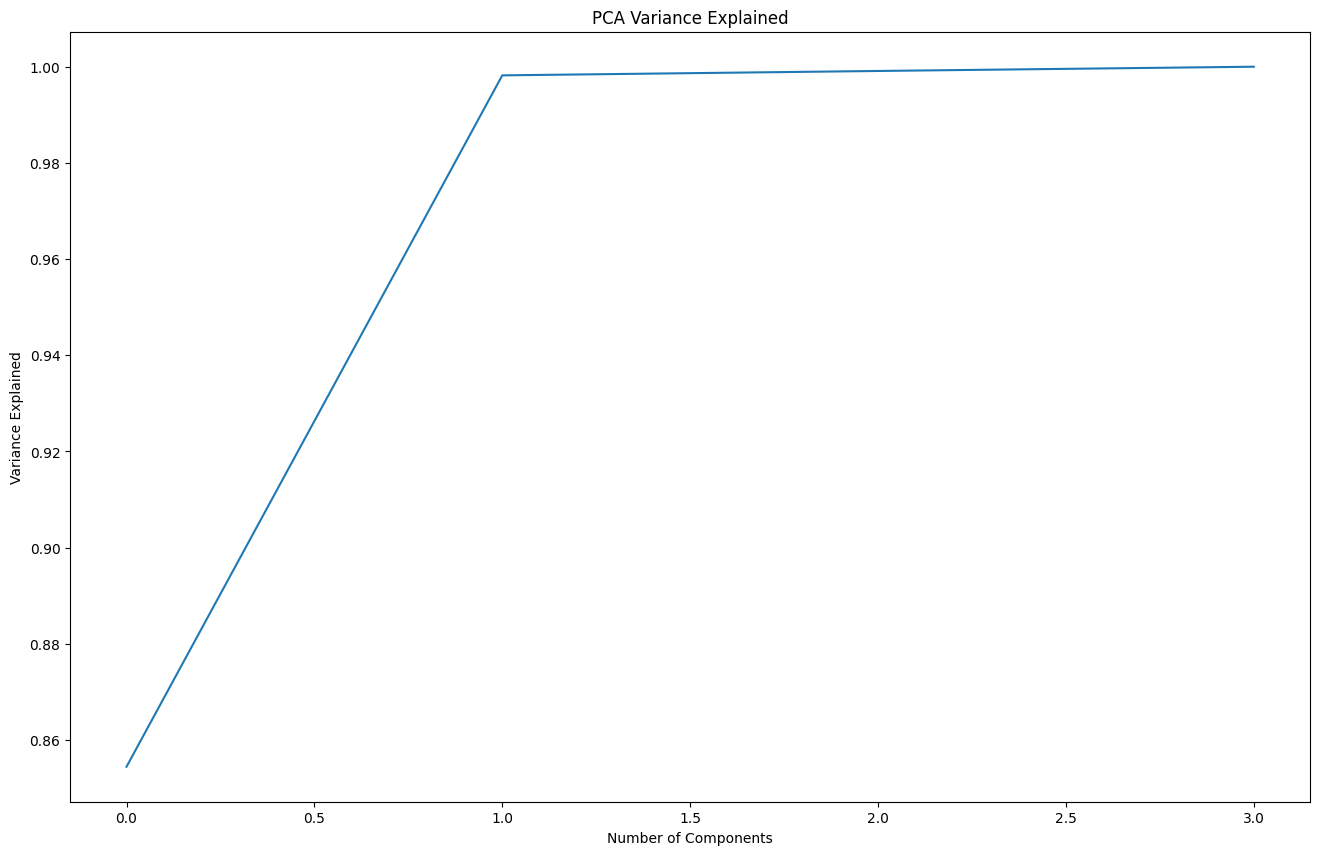

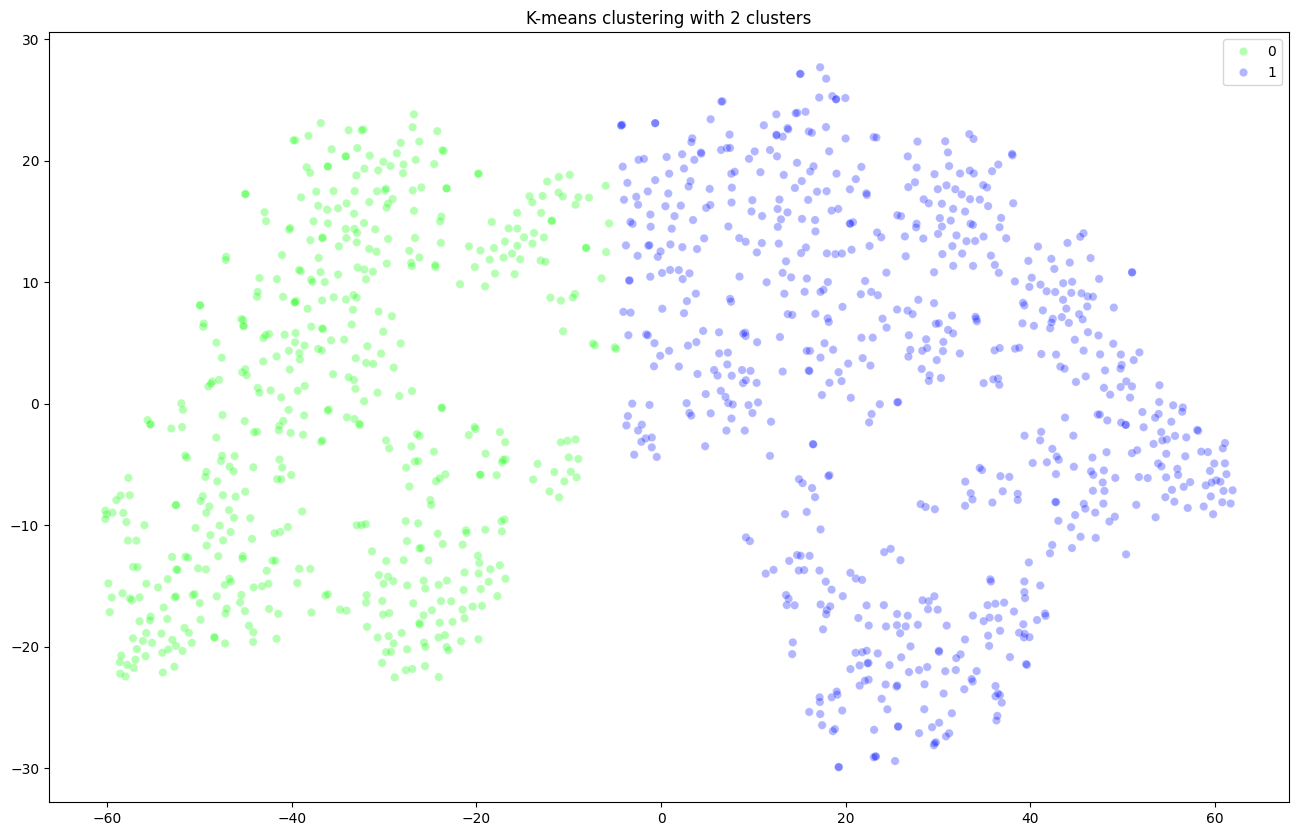

In [7]:
# ========================= #
#  Visualization Tests
# ========================= #

import matplotlib.pyplot as plt

# Plot PCA variance
wrapped_dataset_pca.plot_pca_variance(combined=True)

# Plot K-means clustering
wrapped_dataset_pca.plot_kmeans(n_clusters=2)

In [5]:
# ========================= #
#  Test WrappedProteinDataset
# ========================= #

# Reload if needed
import project_root.dataset.wrapped_protein_dataset
importlib.reload(project_root.dataset.wrapped_protein_dataset)

# Create WrappedProteinDataset instance (PCA-reduced)
wrapped_dataset_pca = WrappedProteinDataset(protein_dataset, reduce_method='tsne')

Converting embeddings and attention weights to NumPy arrays...
Applying random projection to reduce attention weights from 6255001 to 1000 dimensions...
Applying dimensionality reduction using tsne...
Applying t-SNE reduction to embeddings
Applying t-SNE reduction to attention weights


In [6]:
# ========================= #
#  Create DataLoader
# ========================= #

from torch.utils.data import DataLoader

# Create DataLoader instance
train_loader = DataLoaderFactory.create_dataloader(protein_dataset, batch_size=16)

# Iterate through DataLoader (just for testing)
for batch in train_loader:
    (embeddings_batch, attention_batch), labels_batch = batch
    print(f"Batch Embeddings Shape: {embeddings_batch.shape}")
    print(f"Batch Attention Shape: {attention_batch.shape}")
    print(f"Batch Labels Shape: {labels_batch.shape}")
    break  # Just print one batch


RuntimeError: stack expects each tensor to be equal size, but got [579, 579] at entry 0 and [707, 707] at entry 1